# Определение тарифа для телеком компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.<br>

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

## Изучение общей информации

### Общие вопросы по данным проекта

Изучим данные таблиц.

####  Таблица users (информация о пользователях):
user_id — уникальный идентификатор пользователя<br>
first_name — имя пользователя<br>
last_name — фамилия пользователя<br>
age — возраст пользователя (годы)<br>
reg_date — дата подключения тарифа (день, месяц, год)<br>
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)<br>
city — город проживания пользователя<br>
tariff — название тарифного плана<br>

In [2]:
users = pd.read_csv('/datasets/users.csv')
#рассмотрим первые пять строк
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [3]:
#общая информация о таблице
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
#пустые значения
users.isnull().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [5]:
#дубликаты
users.duplicated().sum()

0

Вывод: Датасет содержит 500 строк уникальных пользователей. В таблице необходимо привести churn_date и reg_date к типу date и исправить пропуски в столбце churn_date.   

####  Таблица calls (информация о звонках):
id — уникальный номер звонка<br>
call_date — дата звонка<br>
duration — длительность звонка в минутах<br>
user_id — идентификатор пользователя, сделавшего звонок<br>

In [6]:
calls = pd.read_csv('/datasets/calls.csv')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [7]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [8]:
#рассмотрим период выборки
calls['call_date'].value_counts()

2018-12-31    1435
2018-12-29    1202
2018-12-30    1192
2018-12-22    1158
2018-12-26    1149
              ... 
2018-01-05      20
2018-01-07      18
2018-01-02       9
2018-01-03       7
2018-01-01       5
Name: call_date, Length: 365, dtype: int64

In [9]:
#рассмотрим продолжительность звонков
calls['duration'].value_counts()

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64

In [10]:
calls.isnull().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [11]:
calls.duplicated().sum()

0

Вывод: Идентификатор столбца `id` в таблице calls имеет тип object, что может сильно ухудшить производительность. Необходимо привести его к целочисленному значению. 
Так же нужно привести `call_date` к типу date и `duration` к типу int. Пустых значений и дубликатов нет. <br>
Большое количество звонков (39613) имеет продолжительность 0 минут.

####  Таблица messages (информация о сообщениях):
id — уникальный номер сообщения<br>
message_date — дата сообщения<br>
user_id — идентификатор пользователя, отправившего сообщение<br>

In [12]:
messages = pd.read_csv('/datasets/messages.csv')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [13]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [14]:
#рассмотрим период выборки
messages['message_date'].value_counts()

2018-12-31    859
2018-12-30    765
2018-12-21    712
2018-12-29    702
2018-12-26    699
             ... 
2018-01-11     12
2018-01-05     10
2018-01-02     10
2018-01-04     10
2018-01-03      4
Name: message_date, Length: 364, dtype: int64

In [15]:
messages.isnull().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [16]:
messages.duplicated().sum()

0

Вывод: в таблице messages необходимо привести `id` к типу int и `message_date` к типу date. Пустых значений и дубликатов нет. 

####  Таблица internet (информация об интернет-сессиях):
id — уникальный номер сессии<br>
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)<br>
session_date — дата интернет-сессии<br>
user_id — идентификатор пользователя<br>

In [17]:
internet = pd.read_csv('/datasets/internet.csv')
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [18]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [19]:
#рассмотрим период выборки
internet['session_date'].value_counts()

2018-12-31    1057
2018-12-30     903
2018-12-25     859
2018-12-26     844
2018-12-22     834
              ... 
2018-01-05      14
2018-01-04       9
2018-01-03       6
2018-01-01       3
2018-01-02       3
Name: session_date, Length: 365, dtype: int64

In [20]:
#рассмотрим количество трафика по сессиям
internet['mb_used'].value_counts()

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

In [21]:
internet.isnull().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [22]:
internet.duplicated().sum()

0

Вывод: в таблице internet  необходимо привести `id` к типу int, `session_date` к типу date и `mb_used` к типу int.
Столбец `Unnamed` можно удалить,  так как он не имеет смысла.
Пустых значений и дубликатов нет. В таблице большое количество значений  `mb_used` (19598) равных 0.

#### Таблица tariffs (информация о тарифах):<br>
tariff_name — название тарифа<br>
rub_monthly_fee — ежемесячная абонентская плата в рублях<br>
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату<br>
messages_included — количество сообщений в месяц, включённых в абонентскую плату<br>
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)<br>
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)<br>
rub_per_message — стоимость отправки сообщения сверх тарифного пакета<br>
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [23]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [24]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Вывод: в таблице tariffs все нормально.

### Вывод: 

Мы рассмотрели таблицы данных пользователей тарифов Ультра и Смарт.
Выборка составляет 500 уникальных пользователей за 2018 год, их звонки, сообщения и трафик интернета. <br>
В таблицах есть пустые значения в дате окончания действия тарифа. Дубликатов, артефактов и аномальных данных нет.  <br>

В таблицах call и internet присутствует большое количество звонков и сессий равных 0.  <br>
Так как они не должны тарифицироваться и учитываться в подсчете, их можно удалить, либо просто в расчетах сводных значений указать, что продолжительность звонка должна быть больше 0. 

## Подготовка данных

### Подготовка данных (замена типов, ошибки, заполнение пропусков и т.д.)

**Users**:

In [25]:
users['age'].value_counts()
users['city'].value_counts()
users['last_name'].value_counts()
users['reg_date'].value_counts() 

2018-05-28    8
2018-11-16    5
2018-04-03    5
2018-07-16    5
2018-01-04    5
             ..
2018-07-01    1
2018-03-25    1
2018-03-06    1
2018-07-17    1
2018-01-25    1
Name: reg_date, Length: 270, dtype: int64

Все данные выглядят нормально.

Заполним пропуски в столбце `churn_date` - дата прекращения пользования тарифом.<br>
Если значение пропущено, то тариф ещё действовал на момент выгрузки данных. <br>
При изучении данных таблиц по звонкам, интернету и смс можно заменить, что выгрузка охватывает период ровно в один год - 2018. <br>
Соответственно датой окончания действия тарифа вместо пустого значения можно поставить 31 декабря 2018 года. 

In [26]:
date_end = pd.to_datetime('2018-12-31', format='%y-%m-%d', errors='ignore')
users['churn_date'] = users['churn_date'].fillna(value=date_end)

In [27]:
#заменим тип данных
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%dT%H:%M:%S')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%dT%H:%M:%S')

#выделим номер месяца из дат
users['reg_month'] = users['reg_date'].dt.month
users['churn_month'] = users['churn_date'].dt.month

**Messages**:


In [28]:
#заменим тип данных
messages['id'] = messages['id'].astype(int)
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%dT%H:%M:%S')

#выделим номер месяца из даты
messages['month'] = messages['message_date'].dt.month
messages.head()
#messages.info()


,id,message_date,user_id,month
0,10000,2018-06-27,1000,6
1,10001,2018-10-08,1000,10
2,10002,2018-08-04,1000,8
3,10003,2018-06-16,1000,6
4,10004,2018-12-05,1000,12


**Calls**:


In [29]:
#заменим тип данных
calls['id'] = calls['id'].astype(int)
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%dT%H:%M:%S')

#выделим номер месяца из даты
calls['month'] = calls['call_date'].dt.month

#округлим секунды разговора до минут в большую сторону
calls['duration'] = np.ceil(calls['duration'])

calls.head()

,id,call_date,duration,user_id,month
0,10000,2018-07-25,0.0,1000,7
1,10001,2018-08-17,0.0,1000,8
2,10002,2018-06-11,3.0,1000,6
3,10003,2018-09-21,14.0,1000,9
4,10004,2018-12-15,6.0,1000,12


**Internet**:


In [30]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [31]:
#заменим тип данных
internet['id'] = internet['id'].astype(int)
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%dT%H:%M:%S')

#выделим номер месяца из даты
internet['month'] = internet['session_date'].dt.month

#округлим мегабайты
internet['mb_used'] = np.ceil(internet['mb_used'])

#удалим столбец "Unnamed: 0"
try:
    internet.drop('Unnamed: 0', axis='columns', inplace=True)
except:
    internet.head()
    
internet.head()

,id,mb_used,session_date,user_id,month
0,10000,113.0,2018-11-25,1000,11
1,10001,1053.0,2018-09-07,1000,9
2,10002,1198.0,2018-06-25,1000,6
3,10003,551.0,2018-08-22,1000,8
4,10004,303.0,2018-09-24,1000,9


### Подготовка пользовательских данных (звонки, смс, объем трафика и т.д.)

Посчитайте для каждого пользователя:<br>
- количество сделанных звонков и израсходованных минут разговора по месяцам;<br>
- количество отправленных сообщений по месяцам;<br>
- объем израсходованного интернет-трафика по месяцам;<br>

Возьмем за основу таблицу users и дополним ее соответственно суммарными значениями звонков, сообщений и трафика по месяцам.

Посчитаем суммарное количество звонков по каждому пользователю:

In [32]:
usercalls_data = (calls
.query('duration > 0')
.pivot_table(index=['user_id', 'month'], values=['duration'], aggfunc = {'count', 'sum'})
.reset_index()
)

usercalls_data.columns = ['user_id', 'month', 'count_calls', 'minutes']
usercalls_data.head(2)

,user_id,month,count_calls,minutes
0,1000,5,17,159.0
1,1000,6,28,172.0


Посчитаем суммарное количество смс по каждому пользователю:

In [33]:
usermessages_data = (messages
.pivot_table(index=['user_id', 'month'], values = 'id', aggfunc= 'count')
.reset_index()
)
usermessages_data.columns = ['user_id', 'month', 'messages']
usermessages_data.head(3)

,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75


Посчитаем суммарное количество трафика по каждому пользователю:

In [34]:
userinternet_data = (internet
.pivot_table(index=['user_id', 'month'], values=['mb_used'],aggfunc = {'mb_used': 'sum'})
.reset_index()
)
userinternet_data.columns = ['user_id', 'month', 'mb_used']
userinternet_data.head(2)

,user_id,month,mb_used
0,1000,5,2256.0
1,1000,6,23257.0


Дополним таблицу user_data суммарными значениями, иcходя из user_id и месяца. Если данные отсутствуют, заполним нулями. 

Соединим между собой таблицы звонков, смс и интернета на основе user_id и месяца. Полученную таблицу соединим с таблицей юзеров.

In [35]:
user_counts = usercalls_data.merge(usermessages_data, how='outer', on=['user_id', 'month'])
user_counts = user_counts.merge(userinternet_data, how='outer', on=['user_id', 'month'])
user_counts = users.merge(user_counts, how='outer', on=['user_id'])

user_counts['messages'] = user_counts['messages'].fillna(value=0)
user_counts['count_calls'] = user_counts['count_calls'].fillna(value=0)
user_counts['minutes'] = user_counts['minutes'].fillna(value=0)
user_counts['mb_used'] = user_counts['mb_used'].fillna(value=0)
user_counts['gb_used'] = user_counts['mb_used']/1024
user_counts['gb_used'] = np.ceil(user_counts['gb_used'])
user_counts.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,month,count_calls,minutes,messages,mb_used,gb_used
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,5.0,17.0,159.0,22.0,2256.0,3.0
1,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,6.0,28.0,172.0,60.0,23257.0,23.0
2,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,7.0,41.0,340.0,75.0,14016.0,14.0
3,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,8.0,42.0,408.0,81.0,14070.0,14.0
4,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,9.0,46.0,466.0,57.0,14581.0,15.0


In [36]:
user_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 16 columns):
user_id        3216 non-null int64
age            3216 non-null int64
churn_date     3216 non-null datetime64[ns]
city           3216 non-null object
first_name     3216 non-null object
last_name      3216 non-null object
reg_date       3216 non-null datetime64[ns]
tariff         3216 non-null object
reg_month      3216 non-null int64
churn_month    3216 non-null int64
month          3214 non-null float64
count_calls    3216 non-null float64
minutes        3216 non-null float64
messages       3216 non-null float64
mb_used        3216 non-null float64
gb_used        3216 non-null float64
dtypes: datetime64[ns](2), float64(6), int64(4), object(4)
memory usage: 427.1+ KB


Мы получили таблицу с расчетами звонков, смс и трафика за каждый месяц по каждому пользователю. <br>
Дополним каждую строчку информацией из тарифа:

In [37]:
#копия столбца tariff для создания индекса
user_counts['tariff_name'] = user_counts['tariff']

#обьединение
user_data = user_counts.set_index('tariff_name').join(tariffs.set_index('tariff_name'))

user_data.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,...,messages,mb_used,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
tariff_name,,,,,,,,,,,,,,,,,,,,,
smart,1001,41,2018-12-31,Москва,Иван,Ежов,2018-11-01,smart,11,12,...,0.0,18452.0,19.0,50,15360,500,550,200,3,3
smart,1001,41,2018-12-31,Москва,Иван,Ежов,2018-11-01,smart,11,12,...,0.0,14053.0,14.0,50,15360,500,550,200,3,3
smart,1002,59,2018-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,12,...,4.0,10871.0,11.0,50,15360,500,550,200,3,3
smart,1002,59,2018-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,12,...,11.0,17601.0,18.0,50,15360,500,550,200,3,3
smart,1002,59,2018-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,12,...,13.0,20347.0,20.0,50,15360,500,550,200,3,3


Рассчитаем помесячную выручку с каждого пользователя. <br>
(вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [38]:
#минуты сверх  тарифа
user_data['minutes_over'] = user_data['minutes']-user_data['minutes_included']
user_data.loc[(user_data.minutes_over < 0), 'minutes_over'] = 0

#смс сверх  тарифа
user_data['messages_over'] = user_data['messages']-user_data['messages_included']
user_data.loc[(user_data.messages_over < 0), 'messages_over'] = 0

#минуты сверх тарифа
user_data['mb_over'] = user_data['mb_used']-user_data['mb_per_month_included']
user_data.loc[(user_data.mb_over < 0), 'mb_over'] = 0

#сумма за минуты
user_data['minutes_sum'] = user_data['minutes_over']*user_data['rub_per_minute']

#сумма за смс
user_data['messages_sum'] = user_data['messages_over']*user_data['rub_per_message']

#сумма за гигабайты
user_data['gb_sum'] = np.ceil(user_data['mb_over']/1024) *user_data['rub_per_gb']

#общая сумма, включая базовый тариф
user_data['sum_total_old'] = (
    user_data['gb_sum']+user_data['messages_sum']+
    user_data['minutes_sum']+user_data['rub_monthly_fee']
)
user_data['sum_total_old'] = round(user_data['sum_total_old'],2)

user_data.sort_values(by = 'user_id', ascending = True).head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,...,rub_per_gb,rub_per_message,rub_per_minute,minutes_over,messages_over,mb_over,minutes_sum,messages_sum,gb_sum,sum_total_old
tariff_name,,,,,,,,,,,,,,,,,,,,,
ultra,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,...,150,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1950.0
ultra,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,...,150,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1950.0
ultra,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,...,150,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1950.0
ultra,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,...,150,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1950.0
ultra,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,...,150,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1950.0


In [39]:
#Объявим переменные 
smart_mb_per_month_included = 15360
smart_messages_included = 50
smart_minutes_included = 500
smart_rub_monthly_fee = 550
smart_rub_per_gb = 200 
smart_rub_per_message = 3
smart_rub_per_minute = 3

ultra_mb_per_month_included = 30720
ultra_messages_included = 1000
ultra_minutes_included = 3000
ultra_rub_monthly_fee = 1950
ultra_rub_per_gb = 150
ultra_rub_per_message = 1
ultra_rub_per_minute = 1

In [40]:
def get_total_sum(row):

    mb_used = row['mb_used']
    tariff = row['tariff']
    minutes = row['minutes']
    messages = row['messages']
    
    mb_over = 0
    messages_over = 0 
    minutes_over = 0
    
    if tariff == 'smart':
        
        if minutes > smart_minutes_included:
            minutes_over = (minutes - smart_minutes_included) * smart_rub_per_minute  
      
        if messages > smart_messages_included:
            messages_over = (messages - smart_messages_included) * smart_rub_per_message
        
        if mb_used > smart_mb_per_month_included:
            mb_over = np.ceil((mb_used - smart_mb_per_month_included)/1024) * smart_rub_per_gb
               
        return (minutes_over + messages_over + mb_over + smart_rub_monthly_fee)
    
    if tariff == 'ultra':    
        
        if minutes > ultra_minutes_included:
            minutes_over = (minutes - ultra_minutes_included) * ultra_rub_per_minute

        if messages > ultra_messages_included:
            messages_over = (messages - ultra_messages_included) * ultra_rub_per_message
      
        if mb_used > ultra_mb_per_month_included:
            mb_over = np.ceil((mb_used - ultra_mb_per_month_included)/1024) * ultra_rub_per_gb
           
        return (minutes_over + messages_over + mb_over + ultra_rub_monthly_fee)

In [41]:
user_counts['sum_total'] = user_counts.apply(get_total_sum, axis=1)
user_counts['sum_total'] = round(user_counts['sum_total'],2)

#подменим старый датасет на новый
user_data = user_counts

### Вывод: 
Типы данных заменены, в том числе индексы таблиц с объектного на целочисленный, пропущенные значения дополнены. <br>
Свели отдельные таблицы в общую совокупность, рассчитали количество сделанных звонков и израсходованных минут разговора, количество отправленных сообщений и объем израсходованного интернет-трафика по месяцам.<br>
Рассчитали общую сумму выручки по каждому пользователю, состоящую из ежемесячной платы по тарифу и стоимости услуг сверх тарифного пакета.


## Анализ и описание данных

Опишите поведение клиентов оператора, исходя из выборки. <br>
Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 

### Среднее, медиана и отклонение

Посчитаем среднее, медиану, дисперсию и стандартное отклонение за один месяц для каждого тарифа.

In [42]:
user_data_smart = user_data.query('tariff == "smart"')
user_data_ultra = user_data.query('tariff == "ultra"')


In [43]:
def print_params(data):
    initial_data = {'Params': ['minutes','messages','gb_used','sum_total']}
    df = pd.DataFrame(initial_data, columns = ['Params'])
    p_mean = []
    p_median = []
    p_var = []
    p_std = []    
    
    for value in df["Params"]:       
            p_mean.append(round(data[value].mean(),2))     
            p_median.append(round(data[value].median(),2))
            p_var.append(round(np.var(data[value]),2))
            p_std.append(round(np.std(data[value]),2))

    df["Среднее"] = p_mean 
    df["Медиана"] = p_median 
    df["Дисперсия"] = p_var 
    df["Среднее отклонение"] = p_std 

    return df

**Тариф Smart**

In [44]:
print_params(user_data_smart)

,Params,Среднее,Медиана,Дисперсия,Среднее отклонение
0,minutes,417.75,421.5,36265.12,190.43
1,messages,33.37,28.0,796.60,28.22
2,gb_used,16.35,17.0,33.25,5.77
3,sum_total,1294.31,1037.0,673575.44,820.72


**Тариф Ultra**

In [45]:
print_params(user_data_ultra)            

,Params,Среднее,Медиана,Дисперсия,Среднее отклонение
0,minutes,526.09,518.0,100950.01,317.73
1,messages,49.31,38.0,2283.10,47.78
2,gb_used,19.51,19.0,97.52,9.88
3,sum_total,2070.94,1950.0,143215.03,378.44


### Гистограммы распределений

Рассмотрим распределение для каждого параметра. Построим боксплоты и гистограммы. 



**Звонки**

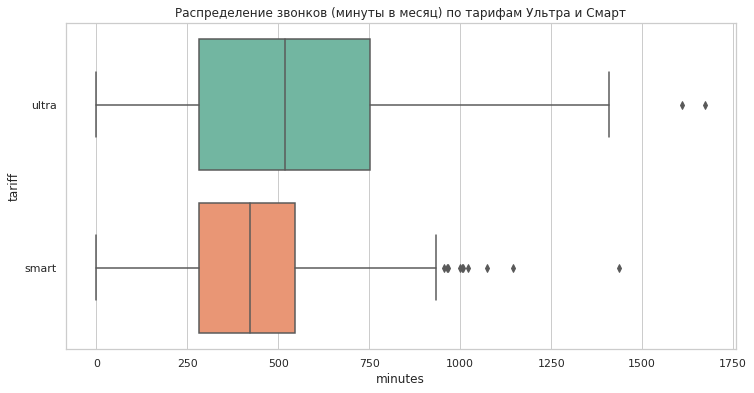

In [46]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
plt.title('Распределение звонков (минуты в месяц) по тарифам Ультра и Смарт')
ax = sns.boxplot(data=user_data, x='minutes',  y='tariff', palette="Set2")


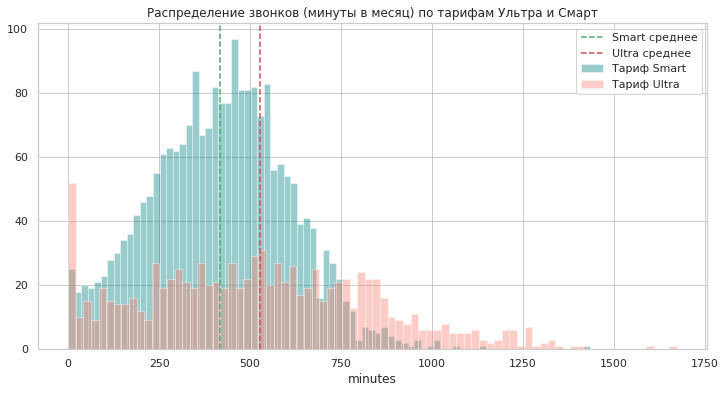

In [47]:
plt.figure(figsize=(12,6))
plt.title('Распределение звонков (минуты в месяц) по тарифам Ультра и Смарт')
sns.distplot(user_data_smart['minutes'],label='Тариф Smart', color="Teal", kde=False, bins=80)
sns.distplot(user_data_ultra['minutes'],label='Тариф Ultra', color="Salmon", kde=False,bins=80 )
plt.axvline(np.mean(user_data_smart['minutes']),color='g', linestyle='--', label='Smart среднее')
plt.axvline(np.mean(user_data_ultra['minutes']),color='r', linestyle='--', label='Ultra среднее')

plt.legend()

Пользователи тарифа Смарт в среднем тратят 417 минут в месяц, пользователи Тарифа Ультра - 526.<br> 
Значительное количество пользователей Ультра вообще не используют звонки.

<br> 
Распределение по тарифу Смарт почти нормальное, с парой пиков, слегка скошенное влево.<br> 
По тарифу Ультра в промежутке от 200 до 800 минут в месяц распределение практически выглядит как плато, дисперсия очень высока.

**СМС**

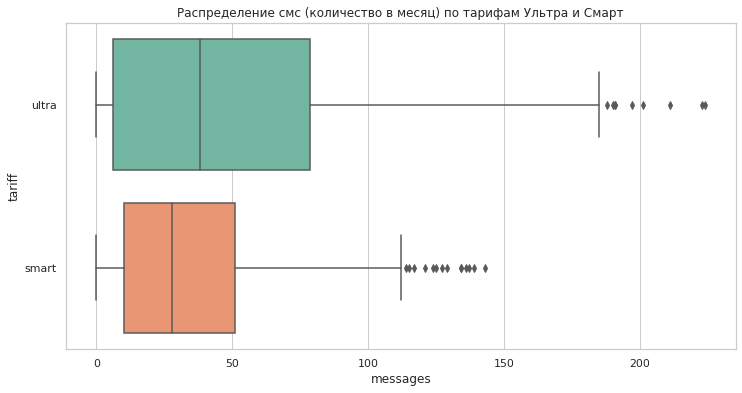

In [48]:
plt.figure(figsize=(12,6))
plt.title('Распределение смс (количество в месяц) по тарифам Ультра и Смарт')
ax = sns.boxplot(data=user_data, x='messages', y='tariff', palette="Set2")

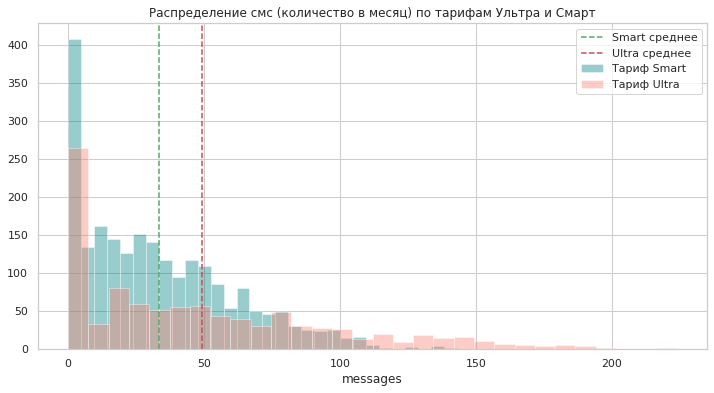

In [49]:
plt.figure(figsize=(12,6))
plt.title('Распределение смс (количество в месяц) по тарифам Ультра и Смарт')
sns.distplot(user_data_smart['messages'], 
             label='Тариф Smart', color="Teal", kde=False, bins=30)
sns.distplot(user_data_ultra['messages'], 
             label='Тариф Ultra', color="Salmon", kde=False, bins=30)
plt.axvline(np.mean(user_data_smart['messages']),color='g', linestyle='--', label='Smart среднее')
plt.axvline(np.mean(user_data_ultra['messages']),color='r', linestyle='--', label='Ultra среднее')

plt.legend()

Пользователи тарифа Смарт в среднем используют около 33 смс в месяц, пользователи Тарифа Ультра - 49.<br> 

Значительное количество пользователей не используют сообщения вовсе.

**Интернет**

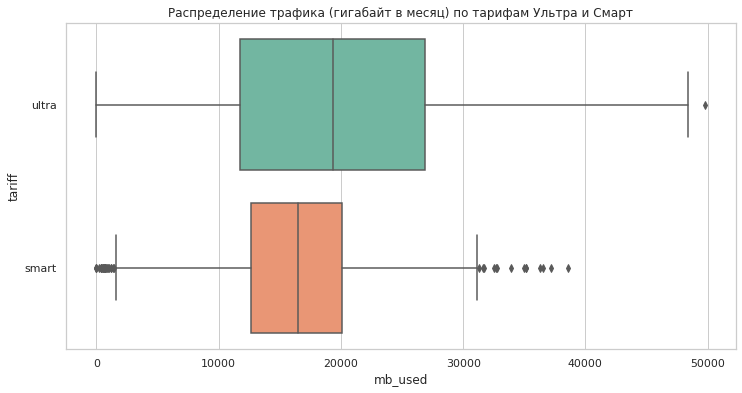

In [50]:
plt.figure(figsize=(12,6))
plt.title('Распределение трафика (гигабайт в месяц) по тарифам Ультра и Смарт')
ax = sns.boxplot(data=user_data, x='mb_used', y='tariff', palette="Set2")

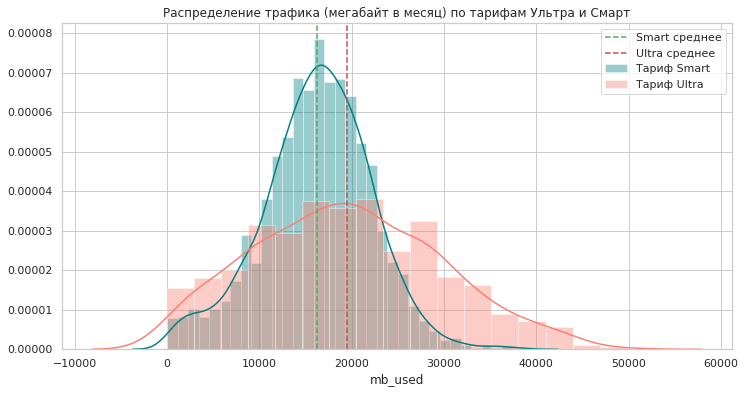

In [51]:
plt.figure(figsize=(12,6))
plt.title('Распределение трафика (мегабайт в месяц) по тарифам Ультра и Смарт')
sns.distplot(user_data_smart['mb_used'], color="Teal",
             label='Тариф Smart',  kde=True)
sns.distplot(user_data_ultra['mb_used'], color="Salmon",
             label='Тариф Ultra',  kde=True)
plt.axvline(np.mean(user_data_smart['mb_used']),color='g', linestyle='--', label='Smart среднее')
plt.axvline(np.mean(user_data_ultra['mb_used']),color='r', linestyle='--', label='Ultra среднее')

plt.legend()

Пользователи тарифа Смарт в среднем используют около 16 гигабайт трафика в месяц, пользователи Тарифа Ультра - около 20.<br> 
Распределение практически нормальное, что говорит о том, что почти все пользователи активно используют интернет, особенно на тарифе Ультра.

**Выручка**

Посмотрим на среднюю выручку по каждого пользователю:

In [52]:
user_data_avg_total = user_data.pivot_table(index = ['tariff'],values = ['user_id', 'sum_total']
                             ,aggfunc = {'user_id': 'nunique', 'sum_total' : 'sum'}, margins=True).reset_index()

user_data_avg_total['avg_total'] = round(user_data_avg_total['sum_total']/user_data_avg_total['user_id'])

user_data_avg_total

,tariff,sum_total,user_id,avg_total
0,smart,2886301.0,351,8223.0
1,ultra,2041950.0,149,13704.0
2,All,4928251.0,500,9857.0


Всего пользователей - 500, из них 351 - на тарифе Смарт, 149 - на тарифе Ультра. <br>
Общая годовая выручка по тарифу Смарт - 2 886 301 р, Ультра - 2 041 950.0 р. <br>
Средняя годовая выручка по тарифу Смарт 8223 р, Ультра - 13704 р. 

Построим гистограмму распределения выручки:

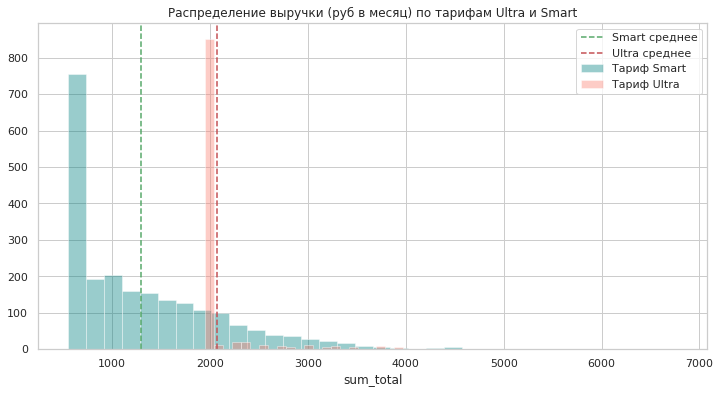

In [53]:
plt.figure(figsize=(12,6))
plt.title('Распределение выручки (руб в месяц) по тарифам Ultra и Smart')
sns.distplot(user_data_smart['sum_total'], color="Teal",
             label='Тариф Smart',  kde=False)
sns.distplot(user_data_ultra['sum_total'], color="Salmon",
             label='Тариф Ultra',  kde=False)
plt.axvline(np.mean(user_data_smart['sum_total']),color='g', linestyle='--', label='Smart среднее')
plt.axvline(np.mean(user_data_ultra['sum_total']),color='r', linestyle='--', label='Ultra среднее')

plt.legend()

Пользователи тарифа Смарт в среднем платят 1294 р за тариф, пользователи тарифа Ультра - 2070 р.<br> 

<i>Ежемесячная плата по тарифу Ультра: 1950 рублей<br> 
Ежемесячная плата по тарифу Смарт: 550 рублей</i>

Из графика видно, что значительное количество пользователей Смарт платит сверх тарифа за минуты и трафик. Средняя ежемесячная плата почти в два раза больше базового тарифа Смарт. <br> 
Пользователи Ультра в основном укладываются в пределы тарифа.

### Вывод
Рассчитали среднее, медиану и отклонения по звонкам, сообщениям и трафику на каждого пользователя в месяц. <br>
Рассчитали среднюю плату за тариф для пользователя и общую годовую выручку тарифам.<br>

В среднем пользователям тарифа Смарт требуется 417 минут, 33 сообщения и 16 гигабайт трафика.<br> 
Пользователям тарифа Ультра требуется 526 минут, 49 сообщений и 19 гигабайт трафика.<br>

С учетом того, что в тариф Смарт включено всего 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика, значительная часть пользователей оплачивает услуги сверх лимита.<br>
В тариф Ультра включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика, что почти полностью покрывает потребности.<br>

Фактическая средняя плата за тариф Смарт составляет 1294 р в месяц, при стоимости тарифа 550 р.<br>
Фактическая средняя плата за тариф Ультра составляет 2070 р в месяц, при стоимости тарифа 1950 р.

## Проверка гипотез и пояснения

### Гипотеза 1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Сформулируем нулевую и альтернативную гипотезы:

H₀ = средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается.<br>
H₁ = средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Рассмотрим две совокупности и сравним дисперсии

In [54]:
avg_total_ultra = user_data_ultra['sum_total']
avg_total_smart = user_data_smart['sum_total']

print('Дисперсия первой совокупности:',np.var(avg_total_ultra))
print('Дисперсия второй совокупности:',np.var(avg_total_smart))

Дисперсия первой совокупности: 143215.03328546917
Дисперсия второй совокупности: 673575.4363387561


In [55]:
from scipy import stats as st
alpha = 0.05

#так как дисперсии различаются, используем параметр equal_var=False.
results = st.ttest_ind(avg_total_ultra, avg_total_smart, equal_var=False) 

print('p-значение:', results.pvalue) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.2414049931248708e-246
Отвергаем нулевую гипотезу


**Вывод**<br>
Мы отвергли гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается.<br>
(итого - выручка различается)



### Гипотеза 2.  Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Сформулируем нулевую и альтернативную гипотезы:

H₀ = средняя выручка пользователей из Москвы и регионов не различается.<br>
H₁ = средняя выручка пользователей из Москвы и регионов различается.

Посмотрим на среднюю выручку пользователей из Москвы и регионов:

In [56]:
user_data.loc[(user_data.city != 'Москва'), 'city'] = 'Регионы'

avg_total_city = user_data.pivot_table(index = ['city'],values = ['user_id', 'sum_total']
                             ,aggfunc = {'user_id': 'nunique', 'sum_total' : 'sum'}, margins=True).reset_index()

avg_total_city['avg_total'] = round(avg_total_city['sum_total']/avg_total_city['user_id'])

avg_total_city

,city,sum_total,user_id,avg_total
0,Москва,947542.0,99,9571.0
1,Регионы,3980709.0,401,9927.0
2,All,4928251.0,500,9857.0


Рассмотрим две совокупности и сравним дисперсии

In [57]:
avg_total_moscow = user_data[user_data['city'] == 'Москва']['sum_total']
avg_total_regions = user_data[user_data['city'] != 'Москва']['sum_total']

print('Дисперсия первой совокупности:',np.var(avg_total_moscow))
print('Дисперсия второй совокупности:',np.var(avg_total_regions))

Дисперсия первой совокупности: 565256.3794161058
Дисперсия второй совокупности: 656445.8668799482


In [58]:
from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(avg_total_moscow, avg_total_regions) 

print('p-значение:', results.pvalue) 

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5277299573181309
Не получилось отвергнуть нулевую гипотезу


**Вывод**<br>
Мы не отвергли гипотезу, что средняя выручка пользователей из Москвы и регионов не различается.<br>
(итого - выручка примерно равна)

## Общий вывод

Мы рассмотрели анализ тарифов Смарт и Ультра на выборке клиентов в 500 человек. <br>
30% пользователей предпочитает тариф Ультра, 70% - тариф Смарт.

Общая годовая выручка по тарифу Смарт - 2 886 301 р, Ультра - 2 041 950 р. <br>
Средняя годовая выручка по тарифу Смарт 8223 р, Ультра - 13704 р.

Фактическая средняя плата за тариф Смарт составляет 1294 р в месяц, при стоимости тарифа 550 р (почти в два раза больше).
Фактическая средняя плата за тариф Ультра составляет 2070 р в месяц, при стоимости тарифа 1950 р.

Активнее всего на обоих тарифах используется интернет-трафик, реже всего пользователи используют функцию смс-сообщений.

Можно сделать вывод, что несмотря на то, что средняя выручка на одного человека на тарифе Смарт меньше, в целом компании они приносят больше. 
Пользователи тарифа Ультра расходуют больше минут, смс и трафика, но пользователи тарифа Смарт значительно чаще используют сверхлимитные услуги.

Четверть клиентов в выборке находится в Москве, при этом средняя выручка на одного пользователя в Москве и в регионах не отличаются.